In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 


### Loading the train dataset

In [2]:
train_df=pd.read_csv('UNSW_NB15_training-set.csv')


In [3]:
train_df


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


### data cleaning 

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [5]:
train_df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [6]:
train_df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [7]:
train_df.shape

(82332, 45)

In [8]:
train_df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

### EDA for the train dataset

attack_cat
Analysis            677
Backdoor            583
DoS                4089
Exploits          11132
Fuzzers            6062
Generic           18871
Normal            37000
Reconnaissance     3496
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64


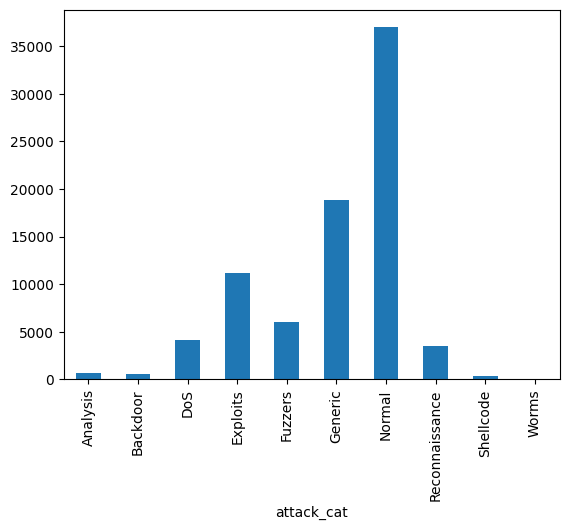

In [9]:
print(train_df.groupby(['attack_cat'])['attack_cat'].count())
train_df.groupby(['attack_cat'])['attack_cat'].count().plot(kind="bar")
plt.show()


label
0    37000
1    45332
Name: label, dtype: int64


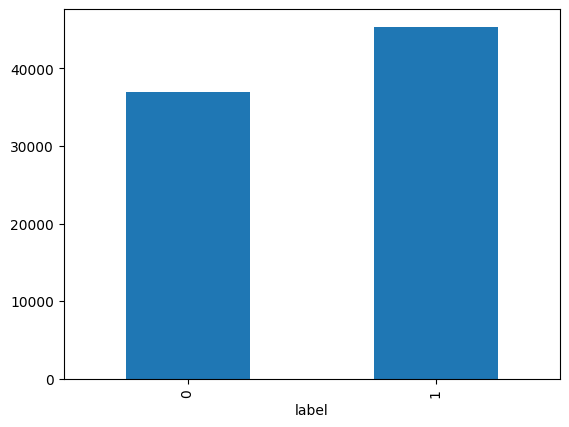

In [10]:
print(train_df.groupby(['label'])['label'].count())
train_df.groupby(['label'])['label'].count().plot(kind="bar")
plt.show()


# normal=0 virus =1

### loading the test dataset


In [11]:
test_df=pd.read_csv('UNSW_NB15_testing-set.csv')


In [12]:
test_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


### data cleaning

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [14]:
test_df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [15]:
test_df.shape

(175341, 45)

### EDA of the test dataset

attack_cat
Analysis           2000
Backdoor           1746
DoS               12264
Exploits          33393
Fuzzers           18184
Generic           40000
Normal            56000
Reconnaissance    10491
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64


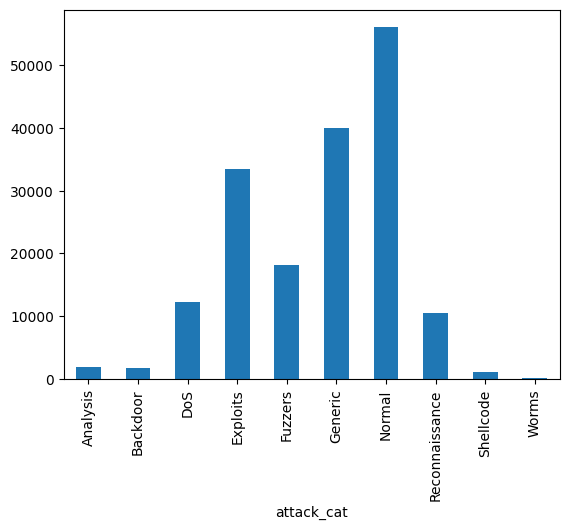

In [16]:
print(test_df.groupby(['attack_cat'])['attack_cat'].count())
test_df.groupby(['attack_cat'])['attack_cat'].count().plot(kind='bar')
plt.show()


label
0     56000
1    119341
Name: label, dtype: int64


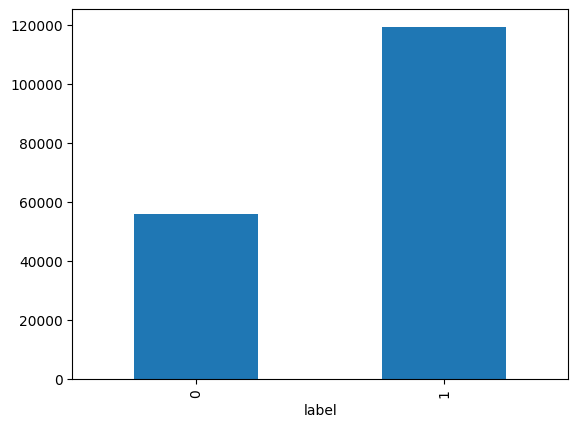

In [17]:
print(test_df.groupby(['label'])['label'].count())
test_df.groupby(['label'])['label'].count().plot(kind='bar')
plt.show()

### concartinanting of test and train dataset

In [18]:
train_df['label']='train_df'
test_df['label']='test_df'

In [19]:
data=pd.concat([train_df,test_df])
data.shape

(257673, 45)

In [20]:
data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt 

In [22]:
data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [23]:
data=data.drop(['rate','attack_cat'],axis=1)


In [24]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,udp,-,INT,2,0,496,0,254,...,1,1,2,0,0,0,1,2,0,train_df
1,2,0.000008,udp,-,INT,2,0,1762,0,254,...,1,1,2,0,0,0,1,2,0,train_df
2,3,0.000005,udp,-,INT,2,0,1068,0,254,...,1,1,3,0,0,0,1,3,0,train_df
3,4,0.000006,udp,-,INT,2,0,900,0,254,...,2,1,3,0,0,0,2,3,0,train_df
4,5,0.000010,udp,-,INT,2,0,2126,0,254,...,2,1,3,0,0,0,2,3,0,train_df
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,254,...,24,13,24,0,0,0,24,24,0,test_df
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,254,...,1,1,2,0,0,0,1,1,0,test_df
175338,175339,0.000009,udp,dns,INT,2,0,114,0,254,...,3,3,13,0,0,0,3,12,0,test_df
175339,175340,0.000009,udp,dns,INT,2,0,114,0,254,...,30,14,30,0,0,0,30,30,0,test_df


label
test_df     175341
train_df     82332
Name: label, dtype: int64


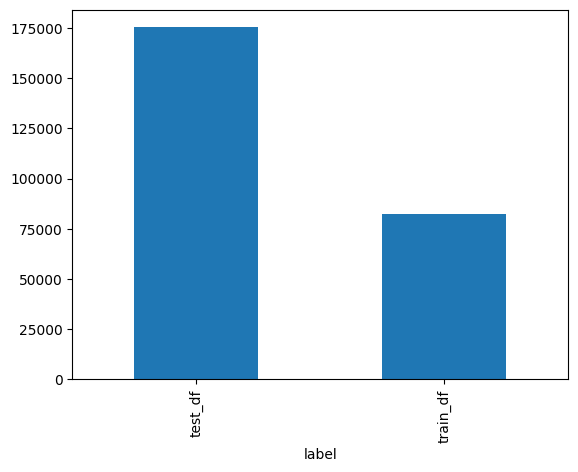

In [25]:
print(data.groupby(['label'])['label'].count())
data.groupby(['label'])['label'].count().plot(kind='bar')
plt.show()

is_sm_ips_ports
0    253995
1      3678
Name: is_sm_ips_ports, dtype: int64


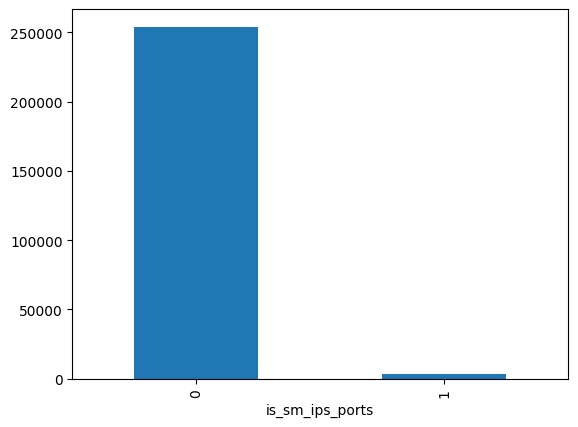

In [26]:
print(data.groupby(['is_sm_ips_ports'])['is_sm_ips_ports'].count())
data.groupby(['is_sm_ips_ports'])['is_sm_ips_ports'].count().plot(kind='bar')
plt.show()

In [27]:
import numpy as np

In [28]:
X=data.drop(['label','state'],axis=1)
y= data['label']

In [29]:
X=X.select_dtypes(np.number)
X

,id,dur,spkts,dpkts,sbytes,dbytes,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1,0.000011,2,0,496,0,254,0,1.803636e+08,0.000000,...,1,1,1,2,0,0,0,1,2,0
1,2,0.000008,2,0,1762,0,254,0,8.810000e+08,0.000000,...,1,1,1,2,0,0,0,1,2,0
2,3,0.000005,2,0,1068,0,254,0,8.544000e+08,0.000000,...,1,1,1,3,0,0,0,1,3,0
3,4,0.000006,2,0,900,0,254,0,6.000000e+08,0.000000,...,2,2,1,3,0,0,0,2,3,0
4,5,0.000010,2,0,2126,0,254,0,8.504000e+08,0.000000,...,2,2,1,3,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,2,0,114,0,254,0,5.066666e+07,0.000000,...,24,24,13,24,0,0,0,24,24,0
175337,175338,0.505762,10,8,620,354,254,252,8.826286e+03,4903.492188,...,1,1,1,2,0,0,0,1,1,0
175338,175339,0.000009,2,0,114,0,254,0,5.066666e+07,0.000000,...,3,3,3,13,0,0,0,3,12,0
175339,175340,0.000009,2,0,114,0,254,0,5.066666e+07,0.000000,...,30,30,14,30,0,0,0,30,30,0


In [30]:
from sklearn import preprocessing as pp
label_encoder=pp.LabelEncoder()
label_encoder


LabelEncoder()

In [31]:
for column in data:
    data['label']=label_encoder.fit_transform(data['label'])

In [32]:
data['label']

0         1
1         1
2         1
3         1
4         1
         ..
175336    0
175337    0
175338    0
175339    0
175340    0
Name: label, Length: 257673, dtype: int64

In [33]:
y=data['label']


In [56]:
from sklearn.metrics import roc_curve,auc
# Predicting the Test set results
from sklearn.metrics import confusion_matrix,accuracy_score

def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)


def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test1)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    #total_accuracy[str((str(model).split('(')[0]))] = accu

In [62]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['normal','malicous']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### DEVELOPMENT OF MODEL

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

### GRADIENT BOOSTING ALGORITHM

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_train_gbc=gbc.predict(X_train)
train_accuracy_gbc=accuracy_score(y_train,y_pred_train_gbc)
print('train_accuracy in graident boosting ',train_accuracy_gbc)
print('==================================================')
y_pred_gbc=gbc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_gbc)
print(' test accuracy of gradient boosting',accuracy)
print('==================================================')

train_accuracy in graident boosting  0.9116189056888861
 test accuracy of gradient boosting 0.9098092177773638




Confusion Matrix:
[[41087  2791]
 [ 3019 17522]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     43878
           1       0.86      0.85      0.86     20541

    accuracy                           0.91     64419
   macro avg       0.90      0.89      0.90     64419
weighted avg       0.91      0.91      0.91     64419



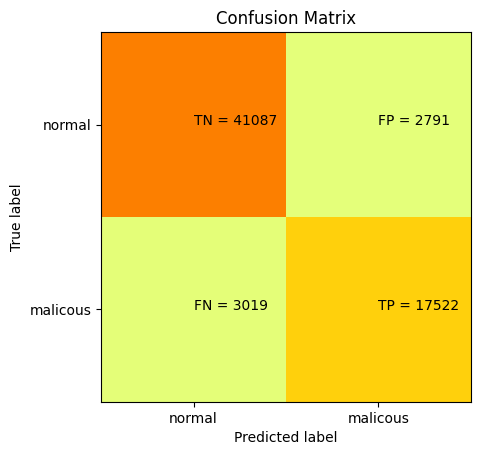

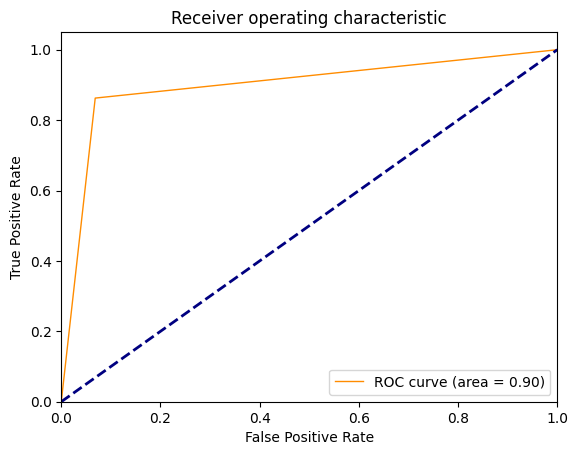

In [64]:
gbc.fit(X_train,y_train)
pred_gbc=gbc.predict(X_test)
report_performance(gbc)
roc_curves(gbc)

### BAGGING CLASSIFIER

In [37]:
from sklearn.ensemble import BaggingClassifier

In [38]:
bc= BaggingClassifier()
bc.fit(X_train,y_train)
y_pred_train_bc=bc.predict(X_train)
train_accuracy_bc=accuracy_score(y_train,y_pred_train_bc)
print('train_accuracy in bagging ',train_accuracy_bc)
print('==================================================')
y_pred_bc=bc.predict(X_test)
accuracy1=accuracy_score(y_test,y_pred_bc)
print(' test accuracy of bagging',accuracy1)
print('==================================================')

train_accuracy in bagging  0.9979819305163153
 test accuracy of bagging 0.9639081637405114




Confusion Matrix:
[[42835  1043]
 [ 1285 19256]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     43878
           1       0.95      0.94      0.94     20541

    accuracy                           0.96     64419
   macro avg       0.96      0.96      0.96     64419
weighted avg       0.96      0.96      0.96     64419



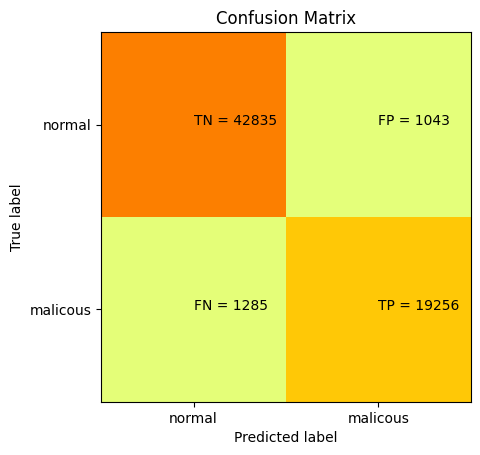

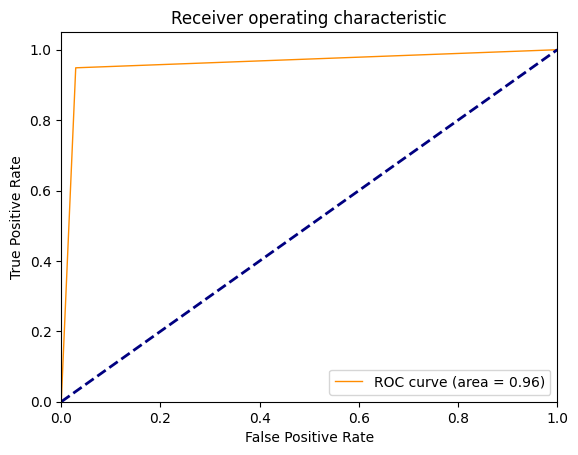

In [65]:
bc.fit(X_train,y_train)
pred_bc=bc.predict(X_test)
report_performance(bc)
roc_curves(bc)

In [39]:
print(confusion_matrix(y_pred_gbc,y_test))
print()
print(confusion_matrix(y_pred_bc,y_test))
print()


[[41087  3019]
 [ 2791 17522]]

[[42856  1303]
 [ 1022 19238]]



In [40]:
from sklearn.metrics import roc_auc_score as roc 

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

# Create individual classifiers
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()

# Create the stacking classifier with a list of classifiers and a meta-classifier
stacking_clf = StackingClassifier(classifiers=[clf1, clf2], meta_classifier=clf2)


In [44]:
# Fit the stacking classifier on the training data
stacking_clf.fit(X_train, y_train)


StackingClassifier(classifiers=[RandomForestClassifier(), LogisticRegression()],
                   meta_classifier=LogisticRegression())

In [45]:
# Make predictions on the testing data
y_pred = stacking_clf.predict(X_test)


In [46]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9621850696223164




Confusion Matrix:
[[42722  1156]
 [ 1280 19261]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43878
           1       0.94      0.94      0.94     20541

    accuracy                           0.96     64419
   macro avg       0.96      0.96      0.96     64419
weighted avg       0.96      0.96      0.96     64419



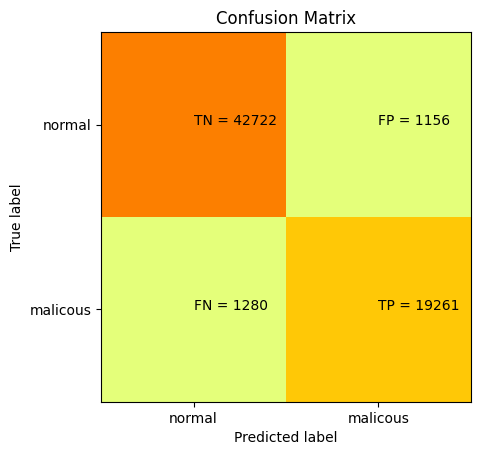

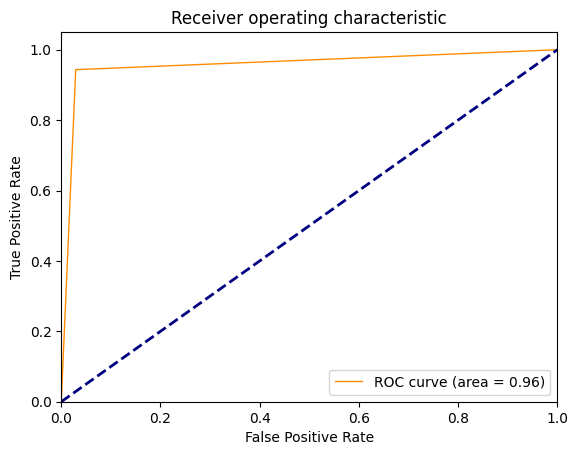

In [67]:
stacking_clf.fit(X_train,y_train)
pred_stc=stacking_clf.predict(X_test)
report_performance(stacking_clf)
roc_curves(stacking_clf)

## voting 

In [68]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [69]:
# Create the Voting Classifier with a list of base classifiers and the voting method
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('lr', clf2)], voting='hard')


In [70]:
# Fit the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression())])

In [71]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9621850696223164




Confusion Matrix:
[[43813    65]
 [18049  2492]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     43878
           1       0.97      0.12      0.22     20541

    accuracy                           0.72     64419
   macro avg       0.84      0.56      0.52     64419
weighted avg       0.79      0.72      0.63     64419



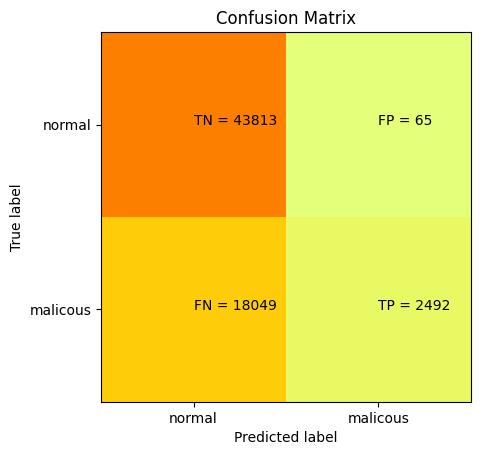

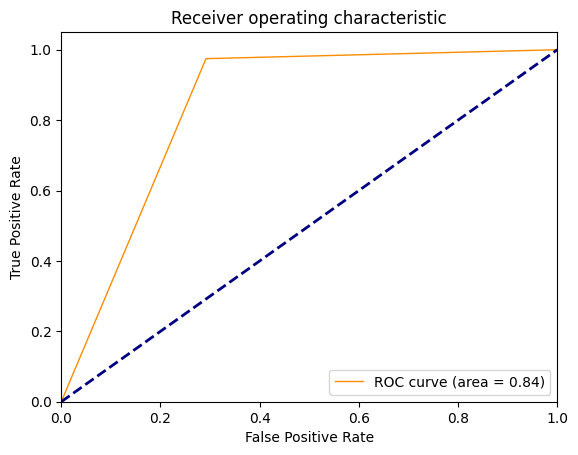

In [72]:
voting_clf.fit(X_train,y_train)
pred_vtc=voting_clf.predict(X_test)
report_performance(voting_clf)
roc_curves(voting_clf)